In [137]:
import pandas as pd
import numpy as np

from bibtexparser.customization import homogenize_latex_encoding
from bibtexparser.bparser import BibTexParser

import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px

In [138]:
from pybibx.base import pbx_probe

# Artigos coletados

Foi encontrado um total de 525 documentos da base de dados fornecidos pelo `Scopus`. A pesquisa de palavras chaves utilizadas foram:

    "BERT" AND "llm"

In [139]:
file_name = './data/scopus.bib'
database = 'scopus'

bibfile = pbx_probe(file_bib= file_name, db= database, del_duplicated= True)

A Total of 525 Documents were Found ( 536 Documents and 11 Duplicates )

Article = 174
Book = 3
Book chapter = 5
Conference paper = 313
Conference review = 16
Review = 14


### Relatório a respeito da consistência dos dados do arquivo



In [140]:
health = bibfile.health_bib()
health

,Entries,Completeness (%),Number of Docs
0,Sources,100.00%,525
1,Abstracts,100.00%,525
2,Affiliation,100.00%,525
3,Author(s),97.14%,510
4,DOI,84.38%,443
5,Keywords - Authors,83.81%,440
6,Keywords - Plus,83.62%,439
7,References,0.00%,0
8,Year,100.00%,525


### Relatório de análise exploratória de dados

Importante perceber inicialmente a discrepância da produção dos EUA a respeito do assunto, (pelo menos na base de dados do Scopus).
Além disso, temos a faixa de tempo extremamente recente do assunto, com o artigo mais antigo sendo do ano de 2022.
A maioria dos documentos coletados são trabalhos de conferência, somente 174 sendo artigos científicos

In [141]:
report = bibfile.eda_bib()
report

,Main Information,Results
0,Timespan,2022-2025
1,Total Number of Countries,70
2,Total Number of Institutions,901
3,Total Number of Sources,333
4,Total Number of References,0
5,Total Number of Languages,4
6,--chinese (# of docs),4
7,--english (# of docs),518
8,--korean (# of docs),1
9,--russian (# of docs),2


In [162]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [163]:
bibfile.data.head(n = 10)

bib_df = bibfile.data
bib_df.head(5)

,abbrev_source_title,abstract,address,affiliation,affiliations,art_number,author,author_keywords,chemicals_cas,coden,correspondence_address,correspondence_address1,document_type,doi,editor,funding_details,funding_text 1,funding_text 2,funding_text 3,isbn,issn,journal,keywords,language,note,number,page_count,pages,pmid,publication_stage,publisher,pubmed_id,references,source,sponsors,title,tradenames,url,volume,year,country
0,Lect. Notes Comput. Sci.,Textual fine-emotion detection is a challenging task that has yet to achieve powerful performanc...,UNKNOWN,"Lu, Alvin Liang Hao Graduate School of Information, Production and Systems, Waseda University, K...","Graduate School of Information, Production and Systems, Waseda University, Kitakyushu, Japan",UNKNOWN,"Lu, Alvin Liang Hao and Iwaihara, Mizuho",BERT; ChatGPT; Fine Emotion Detection; Large Language Model; Llama3,UNKNOWN,UNKNOWN,"A.L.H. Lu; Graduate School of Information, Production and Systems, Waseda University, Kitakyushu...",Corresponding Author UNKNOWN,Conference paper,10.1007/978-981-96-0865-2_19,Oliver G. and Frings-Hessami V. and Du J.T. and Tezuka T.,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,978-981960864-5,03029743,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence ...,Speech recognition; 'current; BERT; ChatGPT; Emotion detection; Fine emotion detection; Language...,English,Cited by: 0,UNKNOWN,UNKNOWN,231 – 245,UNKNOWN,Final,Springer Science and Business Media Deutschland GmbH,UNKNOWN,UNKNOWN,Scopus,UNKNOWN,Using Annotator Labels Instead of Golden Labels for Fine Emotion Detection,UNKNOWN,https://www.scopus.com/inward/record.uri?eid,15493 LNCS,2025,Japan
1,J Constr Eng Manage,"Unexpected uncertainties often arise during construction project execution, impacting performanc...",UNKNOWN,"Shrestha, Rabin Civil and Environmental Engineering and Construction, Howard R. Hughes College o...","Civil and Environmental Engineering and Construction, Howard R. Hughes College of Engineering, U...",UNKNOWN,"Shrestha, Rabin and Ko, Taewoo and Lee, Jeehee",Change order; Construction bid documents; Cost; Lage language model (LLM); Natural language proc...,UNKNOWN,JCEMD,"J. Lee; School of Architecture and Building Science, Chung-Ang Univ., Seoul, 06974, South Korea;...",Corresponding Author UNKNOWN,Article,10.1061/JCEMD4.COENG-15689,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,07339364,Journal of Construction Engineering and Management,Cosine transforms; Costs; Data accuracy; Electric transformer testing; Information management; N...,English,Cited by: 0,4,UNKNOWN,UNKNOWN,UNKNOWN,Final,American Society of Civil Engineers (ASCE),UNKNOWN,UNKNOWN,Scopus,UNKNOWN,Quantifying Project Uncertainties: Leveraging Historical Bid and Change Order Data for Automated...,UNKNOWN,https://www.scopus.com/inward/record.uri?eid,151,2025,South Korea
2,Lect. Notes Comput. Sci.,"The ability to reason over laws is essential for legal professionals, facilitating interpreting ...",UNKNOWN,"Presa, João Paulo Cavalcante Federal University of Goias (UFG), Goiânia, Brazil","Federal University of Goias (UFG), Goiânia, Brazil",UNKNOWN,"Presa, João Paulo Cavalcante and Camilo Junior, Celso Gonçalves and Oliveira, Sávio Salvarino Te...",Large Language Models (LLMs); Legal Question Answering; Legal Reasoning; Tax Law,UNKNOWN,UNKNOWN,"J.P.C. Presa; Federal University of Goias (UFG), Goiânia, Brazil; email: joaopaulop@discente.ufg.br",Corresponding Author UNKNOWN,Conference paper,10.1007/978-3-031-79029-4_32,Paes A. and Verri F.A.N.,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,978-303179028-7,03029743,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence ...,Government data processing; Laws and legislation; Taxation; Language model; Large language model...,English,Cited by: 0,UNKNOWN,UNKNOWN,460 – 474,UNKNOWN,Final,Springer Science and Business Media Deutschland GmbH,UNKNOWN,UNKNOWN,Scopus,UNKNOWN,Evaluating Large Language Models for Tax Law Reasoning,UNK

In [144]:
def extrair_pais(afiliacao):

    if afiliacao == 'UNKNOWN' or pd.isna(afiliacao):
        return None
    partes = str(afiliacao).strip('{}').split(',')
    return partes[-1].strip()

bib_df['country'] = bib_df['affiliations'].apply(extrair_pais)


Plot sobre a distribuição geográfica das produções

Podemos notar uma presença relevante da Índia e Alemanha no assunto

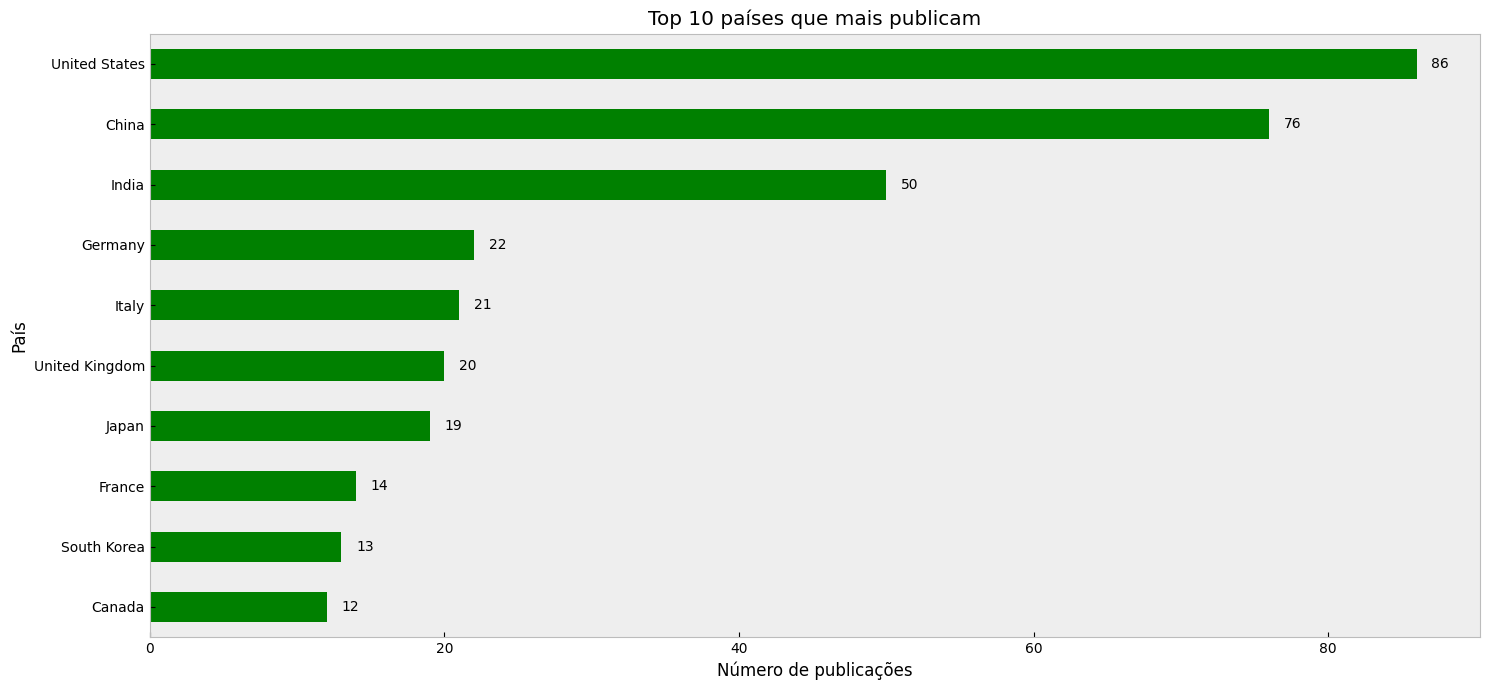

In [145]:
country_count = bib_df['country'].value_counts().head(10).sort_values(ascending=True)

country_count.plot(kind='barh', color='green', figsize=(15, 7))
plt.title("Top 10 países que mais publicam")
plt.ylabel("País")
plt.xlabel("Número de publicações")

for index, values in enumerate(country_count):
    plt.text(values + 1, index, str(values), va='center')

plt.grid(False)
plt.tight_layout()
plt.show()

### Análise de termos dos artigos

#### Nuvem de palavras

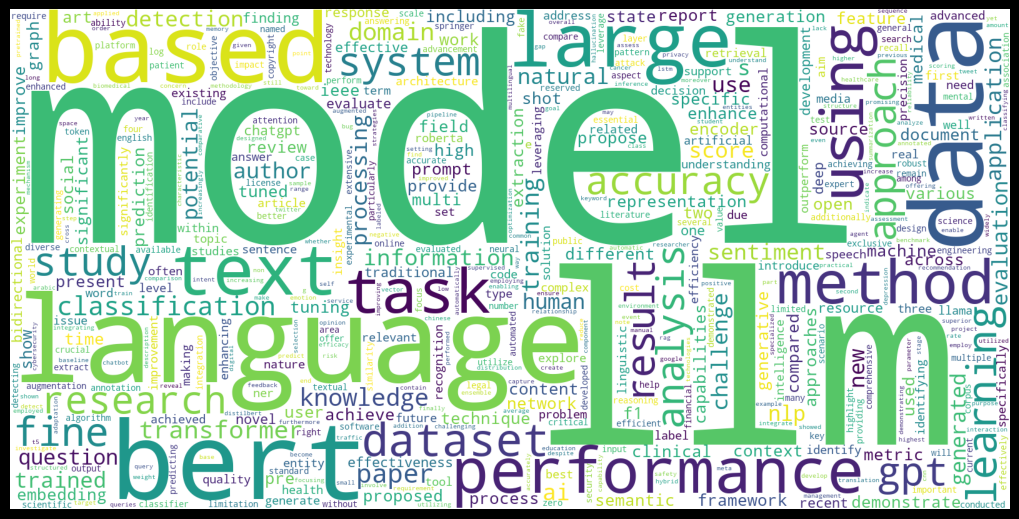

In [146]:
bibfile.word_cloud_plot(entry = 'abs', size_x = 10, size_y = 8, wordsn = 500, rmv_custom_words = [])

Relatório das frequência de termos

In [147]:
bibfile.get_top_ngrams(view= "notebook", entry= "abs", ngrams= 1, stop_words=['en'], rmv_custom_words=[], wordsn= 15)

In [148]:
from prettytable import PrettyTable

Análise da importância nos documentos

In [149]:
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|     Word 1     | Importance 1 |     Word 2     | Importance 2 |     Word 3     | Importance 3 |     Word 4     | Importance 4 |     Word 5     | Importance 5 |
+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|     model      |     1.0      |      llm       |    0.6842    |    language    |    0.4902    |      bert      |    0.3899    |      data      |    0.3349    |
|     based      |    0.3066    |     large      |    0.2999    |      text      |    0.2577    |  performance   |    0.2418    |      task      |    0.232     |
|     method     |    0.2212    |     using      |    0.2176    |    dataset     |    0.2135    |    learning    |    0.178     |     system     |    0.1662    |
|      fine      |    0.1656

Contagem de participações de países nos artigos

In [150]:
countries_tree_map = bibfile.tree_map(view = 'notebook', entry = 'ctr', topn = 20)

countries_tree_map

Contagem dos periódicos

In [151]:
periodicos_tree_map = bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 20)

periodicos_tree_map

Contagem de palavras chaves

In [152]:
keywords_tree_map = bibfile.tree_map(view = 'notebook', entry = 'kwp', topn = 20)

keywords_tree_map

In [153]:
with open("./data/scopus.bib", encoding="utf-8") as bibtex_file:
    parser = BibTexParser(common_strings=True)
    parser.customization = homogenize_latex_encoding
    bib_database = parser.parse_file(bibtex_file)
df = pd.DataFrame(bib_database.entries)

In [ ]:
# Adicionando coluna pais
df['country'] = df['affiliations'].apply(extrair_pais)

# Filtrando a contagem de citações
df['note'] = df['note'].str.extract(r'Cited by: (\d+)').astype(int)
df.rename(columns={'note':'cited_by_count'}, inplace= True)

### Análise dos top15 artigos mais citados

Surpreendentemente o top1 e top2 artigos não foram produções americanas, temos um artigo da Alamenha como top1 (137) citações e em 2º lugar um artigo de Singapura com 62 citações

In [155]:
top15 = df.dropna(subset=['cited_by_count']).sort_values(by='cited_by_count', ascending=False).head(15)

In [168]:
pd.set_option('max_colwidth', 500)
top15_view = top15[['cited_by_count', 'title', 'author', 'year', 'country', 'affiliations']]
top15_view['title'] = top15_view['title'].apply(lambda x: x.replace("{", "").replace("}", "") if isinstance(x, str) else x)
top15_view

,cited_by_count,title,author,year,country,affiliations
267,137,ChatGPT in healthcare: A taxonomy and systematic review,"Li, Jianning and Dada, Amin and Puladi, Behrus and Kleesiek, Jens and Egger, Jan",2024,Germany,"Institute for Artificial Intelligence in Medicine, University Hospital Essen (A{\""o}R), Girardetstra{\ss}e 2, Essen, 45131, Germany; Institute of Medical Informatics, University Hospital RWTH Aachen, Pauwelsstra{\ss}e 30, Aachen, 52074, Germany; Department of Oral and Maxillofacial Surgery, University Hospital RWTH Aachen, Pauwelsstra{\ss}e 30, Aachen, 52074, Germany; Center for Virtual and Extended Reality in Medicine (ZvRM), University Hospital Essen, University Medicine Essen, Hufelandstr..."
220,62,"Bad Actor, Good Advisor: Exploring the Role of Large Language Models in Fake News Detection","Hu, Beizhe and Sheng, Qiang and Cao, Juan and Shi, Yuhui and Li, Yang and Wang, Danding and Qi, Peng",2024,Singapore,"CAS Key Lab of Intelligent Information Processing, Institute of Computing Technology, Chinese Academy of Sciences, China; University of Chinese Academy of Sciences, China; National University of Singapore, Singapore"
139,60,Fine-tuning ChatGPT for automatic scoring,"Latif, Ehsan and Zhai, Xiaoming",2024,United States,"AI4STEM Education Center, University of Georgia, Athens, GA, United States"
477,52,"ChatGPT for digital forensic investigation: The good, the bad, and the unknown","Scanlon, Mark and Breitinger, Frank and Hargreaves, Christopher and Hilgert, Jan-Niclas and Sheppard, John",2023,Ireland,"Forensics and Security Research Group, School of Computer Science, University College Dublin, Ireland; School of Criminal Justice, University of Lausanne, Lausanne, Switzerland; Department of Computer Science, University of Oxford, United Kingdom; Fraunhofer FKIE, Bonn, Germany; Department of Computing and Mathematics, South East Technological University, Waterford, Ireland"
145,49,A multimodal approach to cross-lingual sentiment analysis with ensemble of transformer and LLM,"Miah, Md Saef Ullah and Kabir, Md Mohsin and Sarwar, Talha Bin and Safran, Mejdl and Alfarhood, Sultan and Mridha, M.F.",2024,Saudi Arabia,"Department of Computer Science, American International University-Bangladesh, Dhaka, 1229, Bangladesh; Faculty of Informatics, E{\""o}tv{\""o}s Lor{\'a}nd University, Budapest, 1117, Hungary; Research Chair of Online Dialogue and Cultural Communication, Department of Computer Science, College of Computer and Information Sciences, King Saud University, Riyadh, 11543, Saudi Arabia; Department of Computer Science, College of Computer and Information Sciences, King Saud University, Riyadh, 11543, ..."
253,29,ChatGPT and finetuned BERT: A comparative study for developing intelligent design support systems,"Qiu, Yunjian and Jin, Yan",2024,United States,"Department of Aerospace \& Mechanical Engineering, University of Southern California, Los Angeles, 90089, CA, United States"
403,29,Event Knowledge in Large Language Models: The Gap Between the Impossible and the Unlikely,"Kauf, Carina and Ivanova, Anna A. and Rambelli, Giulia and Chersoni, Emmanuele and She, Jingyuan Selena and Chowdhury, Zawad and Fedorenko, Evelina and Lenci, Alessandro",2023,Italy,"Department of Brain and Cognitive Sciences, Massachusetts Institute of Technology, United States; McGovern Institute for Brain Research, Massachusetts Institute of Technology, United States; Computer Science and Artificial Intelligence Lab, Massachusetts Institute of Technology, United States; Department of Modern Languages, Literatures and Cultures, University of Bologna, Italy; Department of Chinese and Bilingual Studies, Hong Kong Polytechnic University, Hong Kong; Department of Mathemati..."
246,28,The Role of Large Language Models in Transforming Emergency Medicine: Scoping Review,"Preiksaitis, Carl and Ashenburg, Nicholas and Bunney, Gabrielle and Chu, Andrew and Kabeer, Rana and Riley, Fran and Ribeira, Ryan and Rose, Christian",2024,United States,"Depart

In [157]:
fig = px.pie(
    top15_view,
    values='cited_by_count',
    names='title',
    title='Top 15 artigos mais citados',
)

fig.update_layout(
    legend=dict(
        orientation='v',       
        xanchor='left',        
        yanchor='auto',        
        font=dict(
            size=14            
        ),
    ),
    width= 1700,
    height= 600
)


fig.update_traces(textinfo='value+percent', hovertext= top15_view['title'], hovertemplate='<b>%{hovertext}</b><br>%{customdata}', customdata=top15_view['country'], pull=[0.05]*len(top15))
fig.show()


### Análise de citações por países

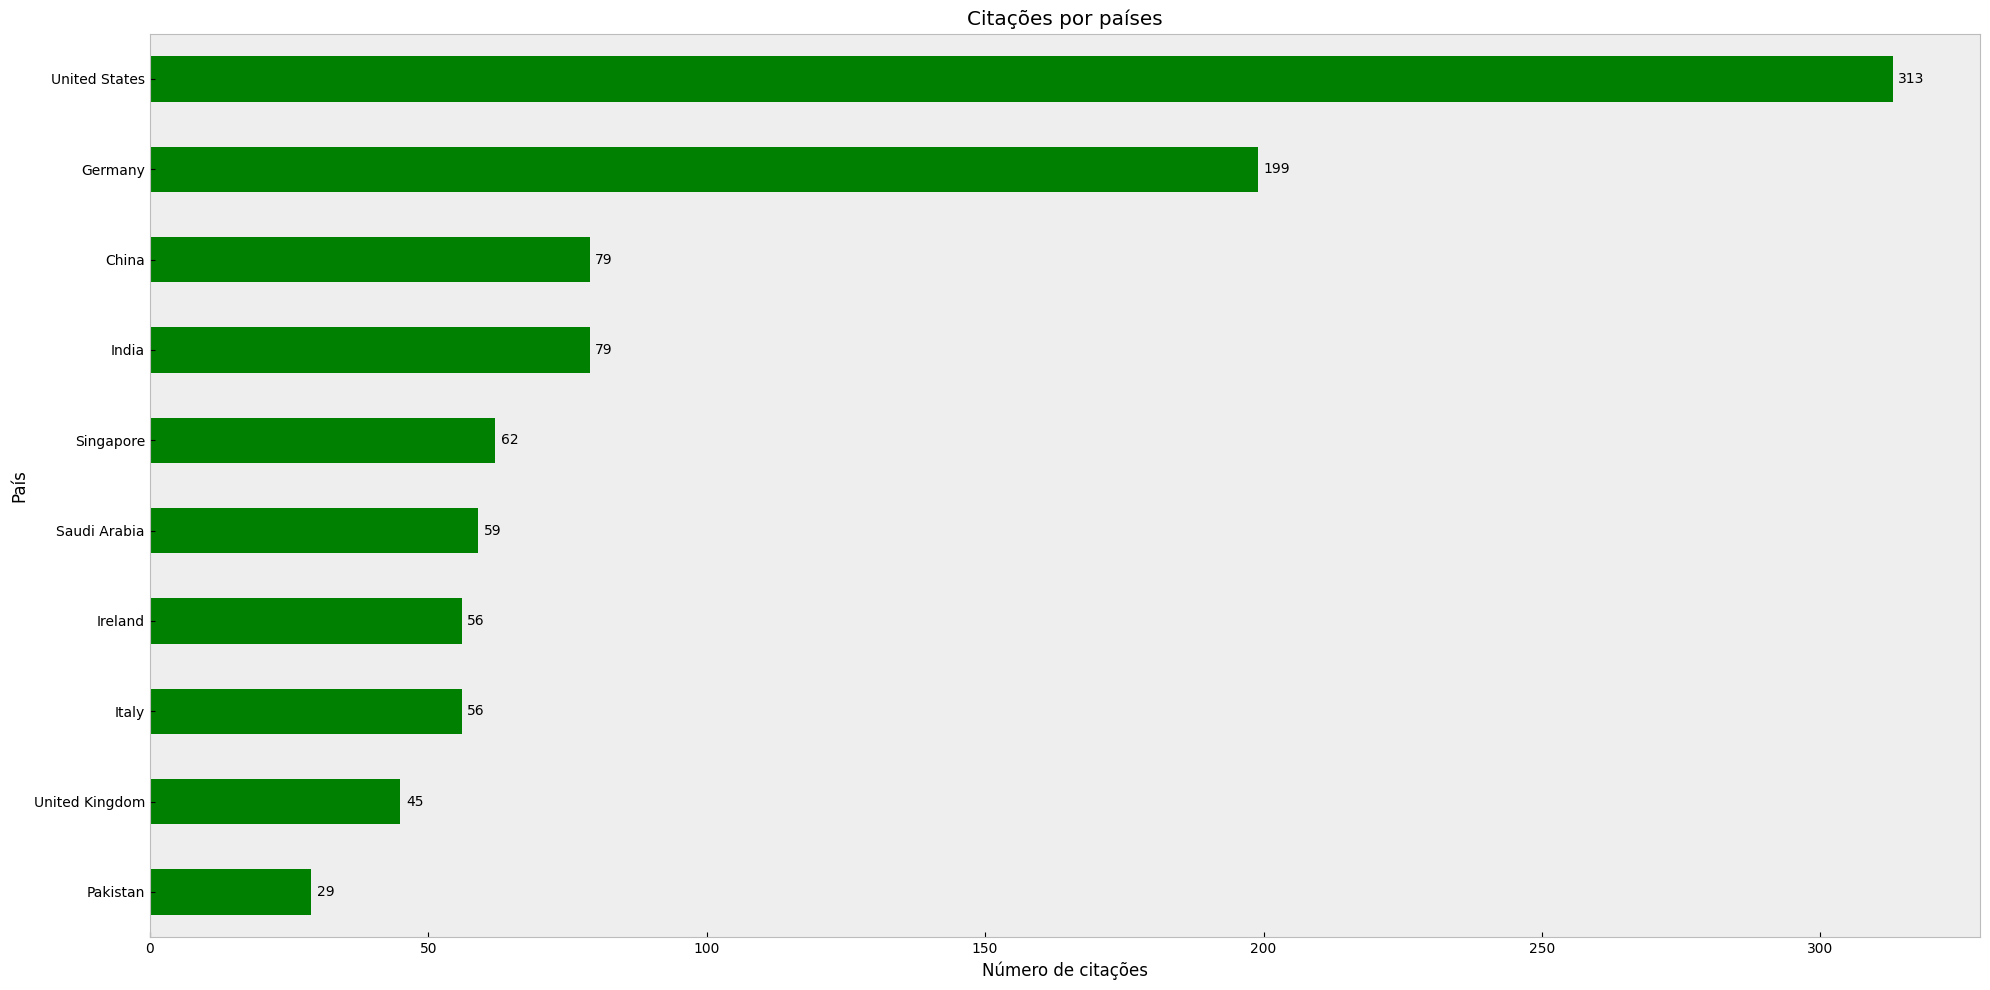

In [158]:
citations_by_country = df.groupby('country')['cited_by_count'].sum().sort_values(ascending=False)

top10_citations = citations_by_country.head(10).sort_values(ascending=True)
top10_citations.plot(kind='barh', color='green', figsize=(20,10))
plt.title("Citações por países")
plt.ylabel("País")
plt.xlabel("Número de citações")

for index, values in enumerate(top10_citations):
    plt.text(values + 1, index, str(values), va='center')

plt.grid(False)
plt.tight_layout()

plt.show()


### VOSviewer dos termos

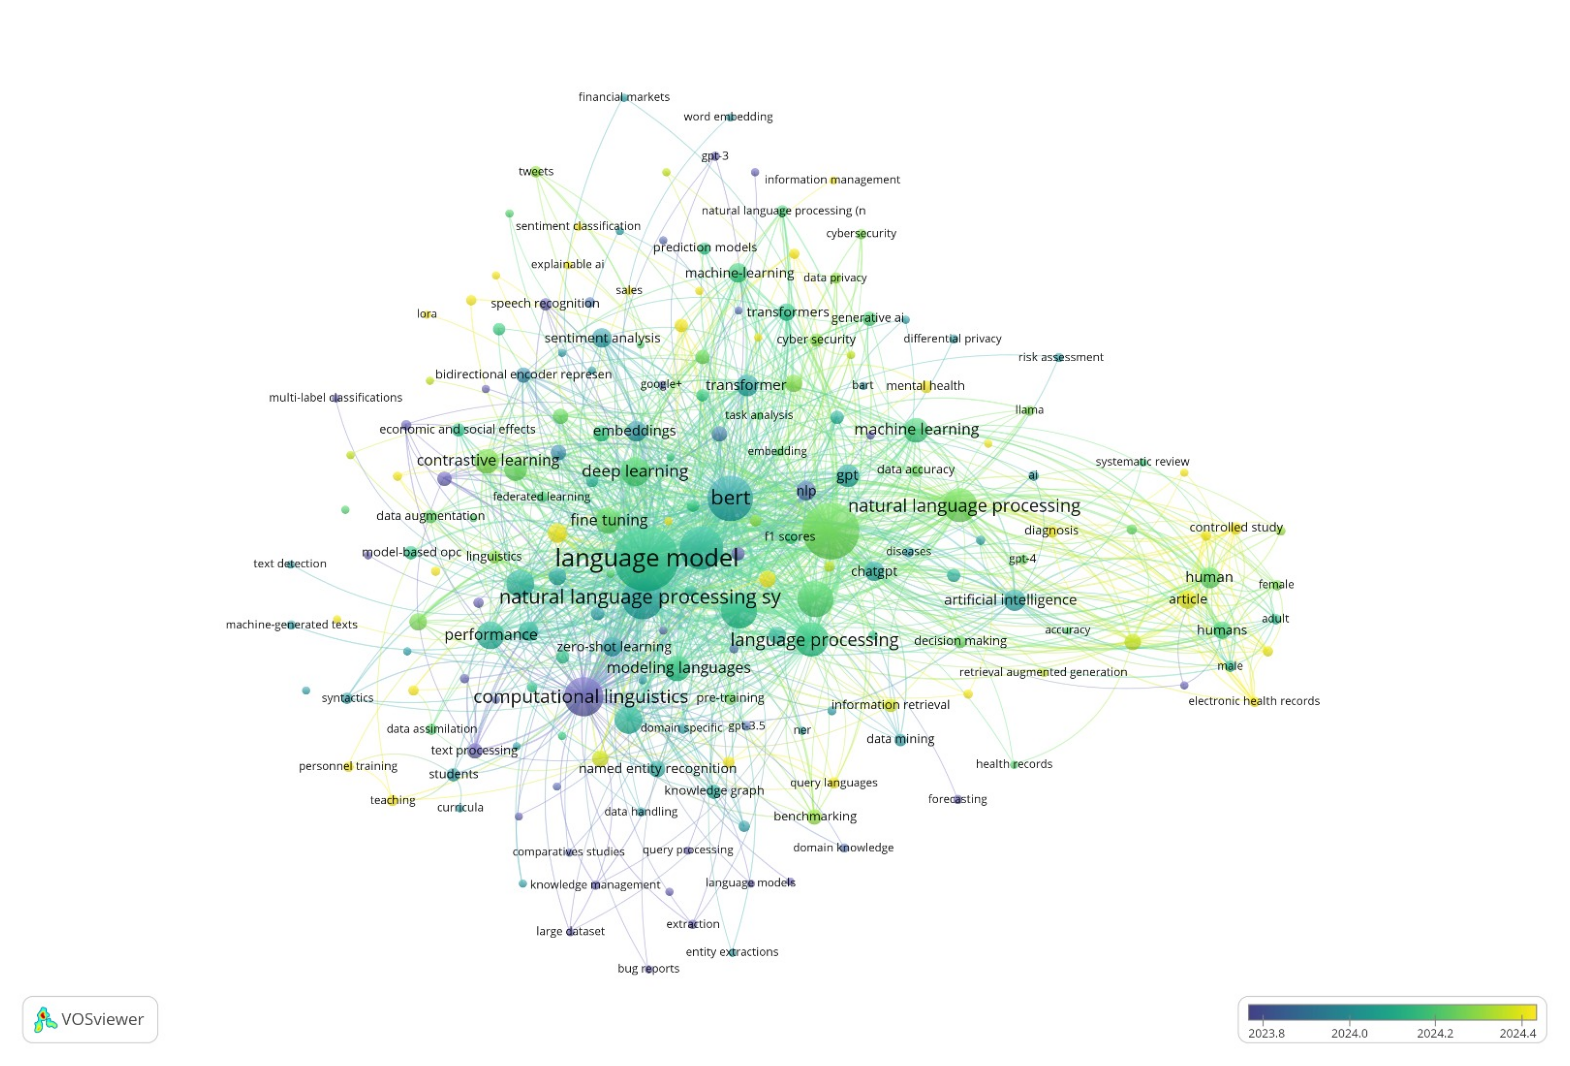

In [159]:
import matplotlib.image as mpimg

img = mpimg.imread("./data/vos.jpeg")

plt.figure(figsize=(20, 16))

plt.imshow(img)

plt.axis('off')
plt.show()